In [ ]:
!unzip /content/fruits-fresh-rotten-classification-master.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-fresh-rotten-classification-master/Datasets/train/rottenapples/rotated_by_60_Screen Shot 2018-06-08 at 2.42.58 PM.png  
  inflating: fruits-fresh-rotten-classification-master/Datasets/train/rottenapples/rotated_by_60_Screen Shot 2018-06-08 at 2.43.29 PM.png  
  inflating: fruits-fresh-rotten-classification-master/Datasets/train/rottenapples/rotated_by_60_Screen Shot 2018-06-08 at 2.44.54 PM.png  
  inflating: fruits-fresh-rotten-classification-master/Datasets/train/rottenapples/rotated_by_60_Screen Shot 2018-06-08 at 2.45.44 PM.png  
  inflating: fruits-fresh-rotten-classification-master/Datasets/train/rottenapples/rotated_by_60_Screen Shot 2018-06-08 at 2.45.50 PM.png  
  inflating: fruits-fresh-rotten-classification-master/Datasets/train/rottenapples/rotated_by_60_Screen Shot 2018-06-08 at 2.45.58 PM.png  
  inflating: fruits-fresh-rotten-classification-master/Datasets/train/rottenapples/rotated_by_60_Screen Shot 

In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.17.0


In [ ]:
local_zip = '/tmp/data.zip'
zip_ref = zipfile.ZipFile('/content/fruits-fresh-rotten-classification-master.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [ ]:
try:
    base_dir = '/tmp'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))
    preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

    train_fresh_apples_dir = make_dir(os.path.join(train_dir, 'Fresh Apples'))
    train_fresh_bananas_dir = make_dir(os.path.join(train_dir, 'Fresh Bananas'))
    train_fresh_oranges_dir = make_dir(os.path.join(train_dir, 'Fresh Oranges'))
    train_rotten_apples_dir = make_dir(os.path.join(train_dir, 'Rotten Apples'))
    train_rotten_bananas_dir = make_dir(os.path.join(train_dir, 'Rotten Bananas'))
    train_rotten_oranges_dir = make_dir(os.path.join(train_dir, 'Rotten Oranges'))

    validation_fresh_apples_dir = make_dir(os.path.join(validation_dir, 'Fresh Apples'))
    validation_fresh_bananas_dir = make_dir(os.path.join(validation_dir, 'Fresh Bananas'))
    validation_fresh_oranges_dir = make_dir(os.path.join(validation_dir, 'Fresh Oranges'))
    validation_rotten_apples_dir = make_dir(os.path.join(validation_dir, 'Rotten Apples'))
    validation_rotten_bananas_dir = make_dir(os.path.join(validation_dir, 'Rotten Bananas'))
    validation_rotten_oranges_dir = make_dir(os.path.join(validation_dir, 'Rotten Oranges'))

    test_fresh_apples_dir = make_dir(os.path.join(test_dir, 'Fresh Apples'))
    test_fresh_bananas_dir = make_dir(os.path.join(test_dir, 'Fresh Bananas'))
    test_fresh_oranges_dir = make_dir(os.path.join(test_dir, 'Fresh Oranges'))
    test_rotten_apples_dir = make_dir(os.path.join(test_dir, 'Rotten Apples'))
    test_rotten_bananas_dir = make_dir(os.path.join(test_dir, 'Rotten Bananas'))
    test_rotten_oranges_dir = make_dir(os.path.join(test_dir, 'Rotten Oranges'))

except OSError:
    pass

In [ ]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
        # img = Image.open(os.path.join(TRAINING, filename)).convert('L')
        # img.save(os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))
        # img = Image.open(os.path.join(VALIDATION, filename)).convert('L')
        # img.save(os.path.join(VALIDATION, filename))

In [ ]:
dataset_train_dir = '/content/fruits-fresh-rotten-classification-master/Datasets/train'
dataset_test_dir = '/content/fruits-fresh-rotten-classification-master/Datasets/test'

fapples_train_dir = os.path.join(dataset_train_dir, 'freshapples')
fbananas_train_dir = os.path.join(dataset_train_dir, 'freshbanana')
foranges_train_dir = os.path.join(dataset_train_dir, 'freshoranges')
rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
rbananas_train_dir = os.path.join(dataset_train_dir, 'rottenbanana')
roranges_train_dir = os.path.join(dataset_train_dir, 'rottenoranges')

fapples_test_dir = os.path.join(dataset_test_dir, 'freshapples')
fbananas_test_dir = os.path.join(dataset_test_dir, 'freshbanana')
foranges_test_dir = os.path.join(dataset_test_dir, 'freshoranges')
rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
rbananas_test_dir = os.path.join(dataset_test_dir, 'rottenbanana')
roranges_test_dir = os.path.join(dataset_test_dir, 'rottenoranges')

print('fapples_train images = ', len(os.listdir(fapples_train_dir)))
print('fbananas_train images = ', len(os.listdir(fbananas_train_dir)))
print('foranges_train images = ', len(os.listdir(foranges_train_dir)))
print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
print('roranges_train images = ', len(os.listdir(roranges_train_dir)))
print()
print('fapples_test images = ', len(os.listdir(fapples_test_dir)))
print('fbananas_test images = ', len(os.listdir(fbananas_test_dir)))
print('foranges_test images = ', len(os.listdir(foranges_test_dir)))
print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
print('roranges_test images = ', len(os.listdir(roranges_test_dir)))

fapples_train images =  1693
fbananas_train images =  1581
foranges_train images =  1466
rapples_train images =  2342
rbananas_train images =  2224
roranges_train images =  1595

fapples_test images =  395
fbananas_test images =  381
foranges_test images =  388
rapples_test images =  601
rbananas_test images =  530
roranges_test images =  403


In [ ]:
SPLIT_SIZE = 0.67
split_data(fapples_train_dir, train_fresh_apples_dir, validation_fresh_apples_dir, SPLIT_SIZE)
split_data(fbananas_train_dir, train_fresh_bananas_dir, validation_fresh_bananas_dir, SPLIT_SIZE)
split_data(foranges_train_dir, train_fresh_oranges_dir, validation_fresh_oranges_dir, SPLIT_SIZE)
split_data(rapples_train_dir, train_rotten_apples_dir, validation_rotten_apples_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_bananas_dir, validation_rotten_bananas_dir, SPLIT_SIZE)
split_data(roranges_train_dir, train_rotten_oranges_dir, validation_rotten_oranges_dir, SPLIT_SIZE)

SPLIT_SIZE = 1.0
split_data(fapples_test_dir, test_fresh_apples_dir, validation_fresh_apples_dir, SPLIT_SIZE)
split_data(fbananas_test_dir, test_fresh_bananas_dir, validation_fresh_bananas_dir, SPLIT_SIZE)
split_data(foranges_test_dir, test_fresh_oranges_dir, validation_fresh_oranges_dir, SPLIT_SIZE)
split_data(rapples_test_dir, test_rotten_apples_dir, validation_rotten_apples_dir, SPLIT_SIZE)
split_data(rbananas_test_dir, test_rotten_bananas_dir, validation_rotten_bananas_dir, SPLIT_SIZE)
split_data(roranges_test_dir, test_rotten_oranges_dir, validation_rotten_oranges_dir, SPLIT_SIZE)

In [ ]:
print(len(os.listdir('/tmp/fruit-dataset/train/Fresh Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Fresh Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Fresh Oranges/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Rotten Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Rotten Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Rotten Oranges/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/val/Fresh Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Fresh Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Fresh Oranges/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Rotten Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Rotten Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Rotten Oranges/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/test/Fresh Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Fresh Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Fresh Oranges/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Rotten Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Rotten Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Rotten Oranges/')))

1135
1060
983
1570
1491
1069

558
521
483
772
733
526

395
381
388
601
530
403


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=0.2, #0.2, 0.5
    shear_range=0.2,
    zoom_range=[0.5, 1.0], # 0.2, 0.5, [0.5,1.0]
    rotation_range=90, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

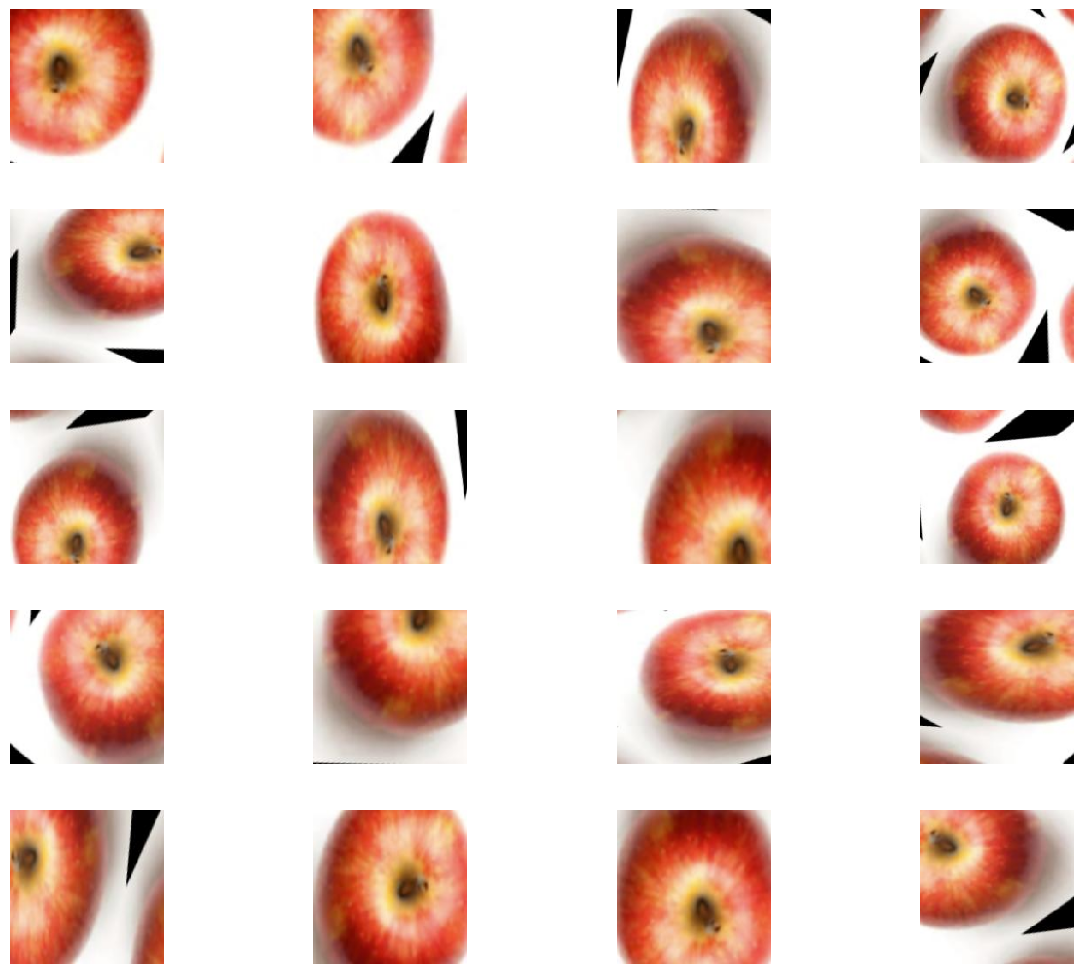

In [ ]:
path_aug = os.path.join(train_fresh_apples_dir, os.listdir(train_fresh_apples_dir)[-1])
img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
  plt.subplot((len(preview_img)//4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                            color_mode="rgb",
                            target_size=(150, 150),
                            interpolation="nearest"))
  plt.axis('off')
plt.show()

for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    # shuffle = False,
                                                    target_size=(150,150), #?
                                                    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         # shuffle = False,
                                                         target_size=(150,150), #?
                                                         class_mode='categorical')

Found 7308 images belonging to 6 classes.
Found 3593 images belonging to 6 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
#if you want to use tranfer learning, skip this cell
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,036,742 (72.62 MB)

 Trainable params: 19,036,742 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import pandas as pd

pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top=False)

for layer in pre_trained_model.layers:
    layer.trainable = False

x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(6, activation='softmax')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer='adam', #RMSprop(lr=0.0001), adam
              loss='categorical_crossentropy',
              metrics=['accuracy'])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_1, built=True>",input_layer_1,False
1,"<Conv2D name=conv2d_3, built=True>",conv2d_3,False
2,"<BatchNormalization name=batch_normalization, built=True>",batch_normalization,False
3,"<Activation name=activation, built=True>",activation,False
4,"<Conv2D name=conv2d_4, built=True>",conv2d_4,False
...,...,...,...
306,"<Activation name=activation_85, built=True>",activation_85,False
307,"<Concatenate name=mixed9_1, built=True>",mixed9_1,False
308,"<Concatenate name=concatenate_1, built=True>",concatenate_1,False
309,"<Activation name=activation_93, built=True>",activation_93,False


In [ ]:
train_len = 0
for foldername in os.listdir('/tmp/fruit-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('/tmp/fruit-dataset/train',foldername)))

val_len = 0
for foldername in os.listdir('/tmp/fruit-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('/tmp/fruit-dataset/val',foldername)))

print(train_len)
print(val_len)

7308
3593


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len//32),
    epochs=3,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=(val_len//32)
)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


228/228 ━━━━━━━━━━━━━━━━━━━━ 740s 3s/step - accuracy: 0.7325 - loss: 11.0915 - val_accuracy: 0.9149 - val_loss: 0.2509
Epoch 2/3
  1/228 ━━━━━━━━━━━━━━━━━━━━ 6:39 2s/step - accuracy: 0.9688 - loss: 0.1348

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.1348 - val_accuracy: 1.0000 - val_loss: 0.1071
Epoch 3/3
228/228 ━━━━━━━━━━━━━━━━━━━━ 724s 3s/step - accuracy: 0.9016 - loss: 0.2981 - val_accuracy: 0.9219 - val_loss: 0.2421


<Figure size 640x480 with 0 Axes>

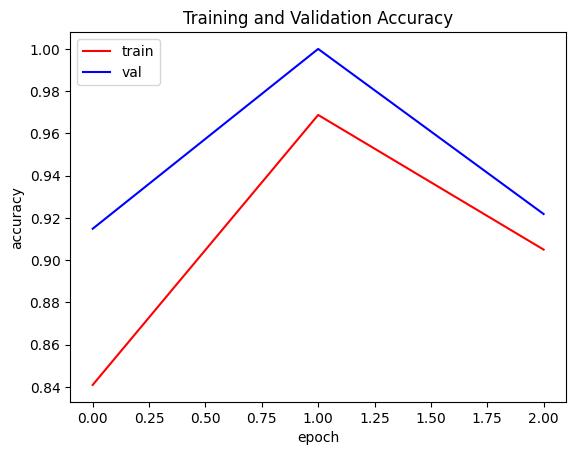

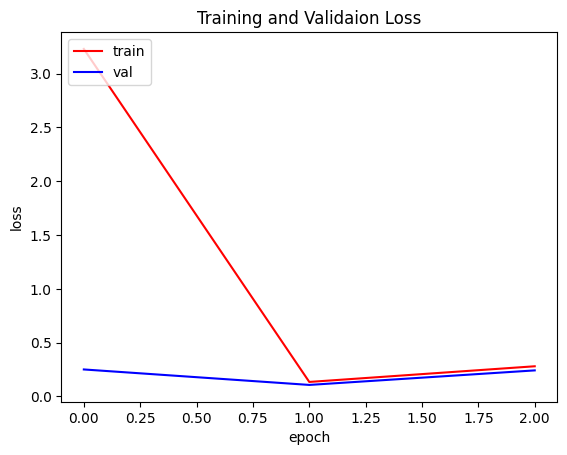

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150, 150),
                                                  shuffle = False,
                                                  class_mode='categorical')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)

Found 2698 images belonging to 6 classes.
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 237s 88ms/step - accuracy: 0.9663 - loss: 0.1300
accuracy test:  0.9362490773200989


In [ ]:
model.save('model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


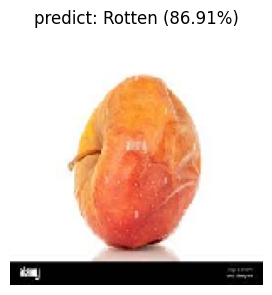

In [ ]:
from keras.utils import load_img, img_to_array
import pathlib
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os


model_predict = tf.keras.models.load_model('model.h5')
model_predict.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# uploaded is a string, not a dictionary, so it doesn't have keys()
uploaded = '/content/download (10).jpeg'
image_name = []
image_conf = []
predict_result = []

# Process the single image directly instead of iterating
path = uploaded
img = load_img(path, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
# imgplot = plt.imshow(img)
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255

images = np.vstack([img])
classes = model_predict.predict(images, batch_size=10)

max = np.amax(classes[0])
if np.where(classes[0] == max)[0] == 0:
    image_name.append(path)  # Append the path
    image_conf.append(max)
    predict_result.append('Fresh')
elif np.where(classes[0] == max)[0] == 1:
    image_name.append(path)  # Append the path
    image_conf.append(max)
    predict_result.append('Fresh')
elif np.where(classes[0] == max)[0] == 2:
    image_name.append(path)  # Append the path
    image_conf.append(max)
    predict_result.append('Fresh')
elif np.where(classes[0] == max)[0] == 3:
    image_name.append(path)  # Append the path
    image_conf.append(max)
    predict_result.append('Rotten')
elif np.where(classes[0] == max)[0] == 4:
    image_name.append(path)  # Append the path
    image_conf.append(max)
    predict_result.append('Rotten')
else:
    image_name.append(path)  # Append the path
    image_conf.append(max)
    predict_result.append('Rotten')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
    plt.subplot((len(image_name)//4)+1, 4, n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(load_img(image_name[n], color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
    title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
    plt.title(title, color='black')
    plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')